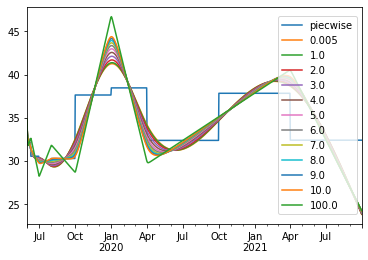

In [34]:
from curves import hyperbolic_tension_spline, bootstrap_contracts
from curves import contract_period as cp
from datetime import date
import pandas as pd

contracts = [
    (date(2019, 5, 31), 34.875), 
    (date(2019, 6, 1), date(2019, 6, 2), 32.87),
    ((date(2019, 6, 3), date(2019, 6, 9)), 32.14),
    (pd.Period(year=2019, month=6, freq='M'), 31.08),
    (cp.month(2019, 7), 29.95),
    (cp.q_3(2019), 30.18),
    (cp.q_4(2019), 37.64),
    (cp.winter(2019), 38.05),
    (cp.summer(2020), 32.39),
    (cp.winter(2020), 37.84),
    (cp.gas_year(2020), 35.12)
]

tension=3.5

def discount_factor(p):
    return 1.0

pc_for_spline, bc_for_spline, _ = bootstrap_contracts(contracts, freq='D')
tensions = [0.005, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 100.0]

pc_for_spline.plot(legend=True)
for tension in tensions:
    smooth_curve, _ = hyperbolic_tension_spline(bc_for_spline, freq='D', tension=tension, 
                                                        discount_factor=discount_factor)
    ax = smooth_curve.plot(legend=True)

ax.legend(['piecwise'] + tensions, loc='center right')

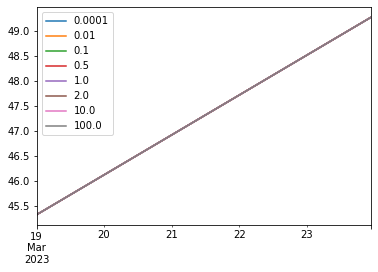

In [25]:
intercept = 45.7
daily_slope = 0.8
num_curve_points = 5

daily_index = pd.period_range(start='2023-03-19', periods = num_curve_points, freq='D')
daily_prices = [intercept + daily_slope * i for i in range(num_curve_points)]
daily_curve = pd.Series(data=daily_prices, index=daily_index)

tensions = [0.0001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0, 100.0]

for tension in tensions:
    hourly_curve, _ = hyperbolic_tension_spline(daily_curve, freq='H', tension=tension)
    ax = hourly_curve.plot(legend=True)

ax.legend(tensions)